In [1]:
import os
import cv2

In [2]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="ZEWEc1ZPB3XNtTHuMvf2"
)

MODEL_ID = "kertas-suara-titik/1"

test_images_results = []
train_images_results = []

for filename in os.listdir(os.path.join("dataset-rotated", "Test")):
    image_path = os.path.join("dataset-rotated", "Test", filename)
    result = CLIENT.infer(image_path, model_id=MODEL_ID)
    test_images_results.append((filename, result))

for filename in os.listdir(os.path.join("dataset-rotated", "Train")):
    image_path = os.path.join("dataset-rotated", "Train", filename)
    result = CLIENT.infer(image_path, model_id=MODEL_ID)
    train_images_results.append((filename, result))

Filter the train dataset to only include images with 9 predictions.

In [3]:
print(len(result['predictions']))
count = 0
filtered_train_images_results = []
for (filename, result) in train_images_results:
    if(len(result['predictions']) != 9):
        count += 1
        if count < 20:
            print(f"File {filename} predicted {len(result['predictions'])}")
    else: 
        filtered_train_images_results.append((filename, result))

count = 0
filtered_test_images_results = []
for (filename, result) in test_images_results:
    if(len(result['predictions']) != 9):
        count += 1
        if count < 20:
            print(f"File {filename} predicted {len(result['predictions'])}")
    else: 
        filtered_test_images_results.append((filename, result))

9
File TPS_019.jpg predicted 8
File TPS_028.jpg predicted 10
File TPS_033.jpg predicted 10
File TPS_042.jpg predicted 0
File TPS_051.jpg predicted 10
File TPS_055.jpg predicted 10
File TPS_064.jpg predicted 10
File TPS_065.jpg predicted 6
File TPS_093.jpg predicted 10
File TPS_102.jpg predicted 11
File TPS_114.jpg predicted 8
File TPS_118.jpg predicted 10
File TPS_126.jpg predicted 8
File TPS_145.jpg predicted 10
File TPS_148.jpg predicted 11
File TPS_154.jpg predicted 10
File TPS_164.jpg predicted 10
File TPS_172.jpg predicted 10
File TPS_185.jpg predicted 10
File TPS_543.jpg predicted 6
File TPS_545.jpg predicted 11
File TPS_548.jpg predicted 10
File TPS_572.jpg predicted 10
File TPS_582.jpg predicted 10
File TPS_593.jpg predicted 1
File TPS_597.jpg predicted 10
File TPS_602.jpg predicted 10
File TPS_605.jpg predicted 12
File TPS_607.jpg predicted 1
File TPS_623.jpg predicted 10
File TPS_628.jpg predicted 11
File TPS_629.jpg predicted 11
File TPS_650.jpg predicted 11
File TPS_670.jpg

In [6]:
import json 

with open("dataset-cropped/filtered-train.json", "w") as outfile: 
    json.dump(filtered_test_images_results, outfile)

with open("dataset-cropped/filtered-test.json", "w") as outfile: 
    json.dump(filtered_train_images_results, outfile)

Testing for one image

In [11]:
# Testing for one image
from functools import cmp_to_key

(filename, result) = filtered_train_images_results[0]
img = cv2.imread(os.path.join("dataset-rotated", "Train", filename))

pred = result['predictions']

def compare(a, b):
    return 1 if (a['x'] + a['y']) > (b['x'] + b['y']) else -1

pred = sorted(pred, key=cmp_to_key(compare))

cropped_imgs = []
for res in pred:
    cropped_imgs.append(img[int(res['y'] - (res['height']/2)): int(res['y'] + (res['height']/2)), 
                            int(res['x'] - (res['width']/2)) : int(res['x'] + (res['width']/2))])

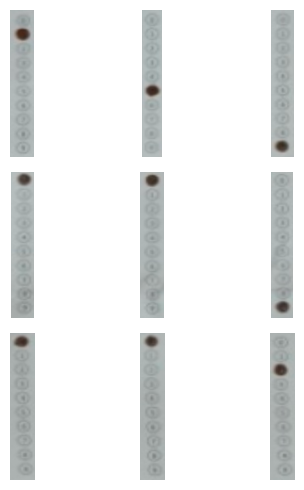

In [12]:
# Show cropped images
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
for i, cImg in enumerate(cropped_imgs):
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    fig = plt.imshow(cropped_imgs[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

Try to export to dataset-cropped folder

In [34]:
import os 

for i, cImg in enumerate(cropped_imgs):
    if not os.path.exists(f"dataset-cropped/Paslon_0{int(i/3) + 1}"):
        os.makedirs(f"dataset-cropped/Paslon_0{int(i/3) + 1}")
    cv2.imwrite(f"dataset-cropped/Paslon_0{int(i/3) + 1}/{i%3}.jpg", cImg)

Mass Export to dataset-cropped folder

In [16]:
from functools import cmp_to_key

def compare(a, b):
    return 1 if (a['x'] + a['y']) > (b['x'] + b['y']) else -1


train_images_results_set = []
for (filename, result) in filtered_train_images_results:
    pred = result['predictions']
    pred = sorted(pred, key=cmp_to_key(compare))

    img = cv2.imread(os.path.join("dataset-rotated", "Train", filename))

    cropped_images = []
    for res in pred:
        cropped_images.append(img[int(res['y'] - (res['height']/2)): int(res['y'] + (res['height']/2)), 
                                int(res['x'] - (res['width']/2)) : int(res['x'] + (res['width']/2))])
        
    for i, cImg in enumerate(cropped_images):
        tps_name = filename.split(".")[0]
        if not os.path.exists(f"dataset-cropped/Train/{tps_name}/Paslon_0{int(i/3) + 1}"):
            os.makedirs(f"dataset-cropped/Train/{tps_name}/Paslon_0{int(i/3) + 1}")
        cv2.imwrite(f"dataset-cropped/Train/{tps_name}/Paslon_0{int(i/3) + 1}/{i%3}.jpg", cImg)

In [17]:
test_images_results_set = []
for (filename, result) in filtered_test_images_results:
    pred = result['predictions']
    pred = sorted(pred, key=cmp_to_key(compare))

    img = cv2.imread(os.path.join("dataset-rotated", "Test", filename))

    cropped_images = []
    for res in pred:
        cropped_images.append(img[int(res['y'] - (res['height']/2)): int(res['y'] + (res['height']/2)), 
                                int(res['x'] - (res['width']/2)) : int(res['x'] + (res['width']/2))])
        
    for i, cImg in enumerate(cropped_images):
        tps_name = filename.split(".")[0]
        if not os.path.exists(f"dataset-cropped/Test/{tps_name}/Paslon_0{int(i/3) + 1}"):
            os.makedirs(f"dataset-cropped/Test/{tps_name}/Paslon_0{int(i/3) + 1}")
        cv2.imwrite(f"dataset-cropped/Test/{tps_name}/Paslon_0{int(i/3) + 1}/{i%3}.jpg", cImg)